In [54]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [18]:
filepath=r'C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\SAVED_MODEL\models.pkl'

In [ ]:
#filepath=r'E:\College\2nd year\Winter project\Thyroid Performance Analysis\SAVED_MODEL\models.pkl'

In [19]:
with open(filepath, 'rb') as file:
    models = pickle.load(file)

In [20]:
def results(y_test,y_pred):
    precision = precision_score(y_test, y_pred, average='weighted',zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print(f"Accuracy: {accuracy * 100:.2f}%")

In [21]:
datasetfilepath=r'C:\Users\dwija\OneDrive\Thyroid-Performance-Analysis\Data\pre_data\Dataset.csv'

In [ ]:
#datasetfilepath=r'E:\College\2nd year\Winter project\Thyroid Performance Analysis\Data\pre_data\Dataset.csv'

In [22]:
Dataset = pd.read_csv(datasetfilepath)

In [23]:
Dataset = Dataset.drop('Unnamed: 0', axis=1) 

In [24]:
X = Dataset.drop('Target', axis=1)  

y = Dataset['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
for model_name, model in models.items():
    
    y_pred = model.predict(X_test)
    print(model_name,":")
    results(y_test,y_pred)
    print("\n")

RandomForest :
Precision: 90.67%
Recall: 90.47%
F1-Score: 90.57%
Accuracy: 90.47%


SVC :
Precision: 90.10%
Recall: 94.92%
F1-Score: 92.45%
Accuracy: 94.92%


KNeighbors :
Precision: 90.93%
Recall: 93.74%
F1-Score: 92.17%
Accuracy: 93.74%


GradientBoosting :
Precision: 95.95%
Recall: 89.01%
F1-Score: 91.47%
Accuracy: 89.01%


XGBoost :
Precision: 91.99%
Recall: 91.66%
F1-Score: 91.82%
Accuracy: 91.66%


BernoulliNB :
Precision: 93.90%
Recall: 94.58%
F1-Score: 92.41%
Accuracy: 94.58%


DecisionTree :
Precision: 91.21%
Recall: 90.89%
F1-Score: 91.05%
Accuracy: 90.89%




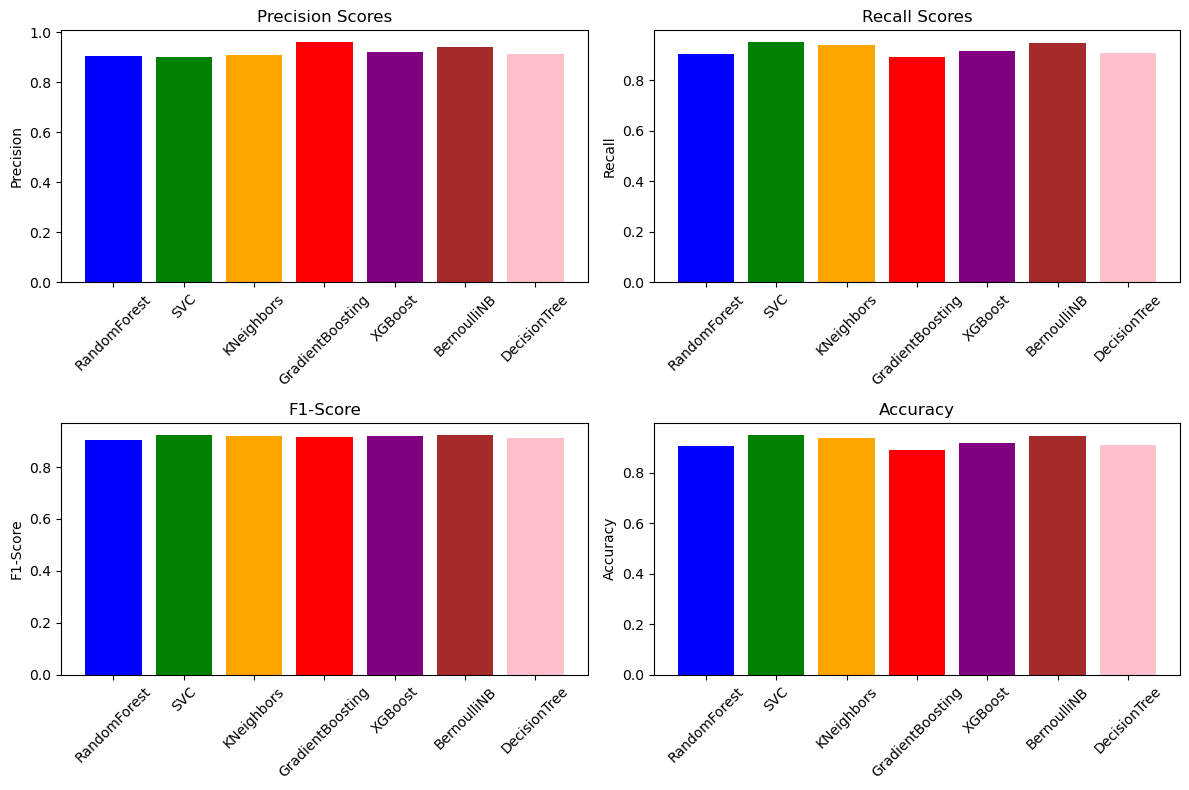

In [43]:
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []

# Calculate metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

# Define colors for each model
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink']

# Create a subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Precision
axs[0, 0].bar(models.keys(), precision_scores, color=colors)
axs[0, 0].set_title('Precision Scores')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot Recall
axs[0, 1].bar(models.keys(), recall_scores, color=colors)
axs[0, 1].set_title('Recall Scores')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot F1-Score
axs[1, 0].bar(models.keys(), f1_scores, color=colors)
axs[1, 0].set_title('F1-Score')
axs[1, 0].set_ylabel('F1-Score')
axs[1, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Plot Accuracy
axs[1, 1].bar(models.keys(), accuracy_scores, color=colors)
axs[1, 1].set_title('Accuracy')
axs[1, 1].set_ylabel('Accuracy')
axs[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.show()

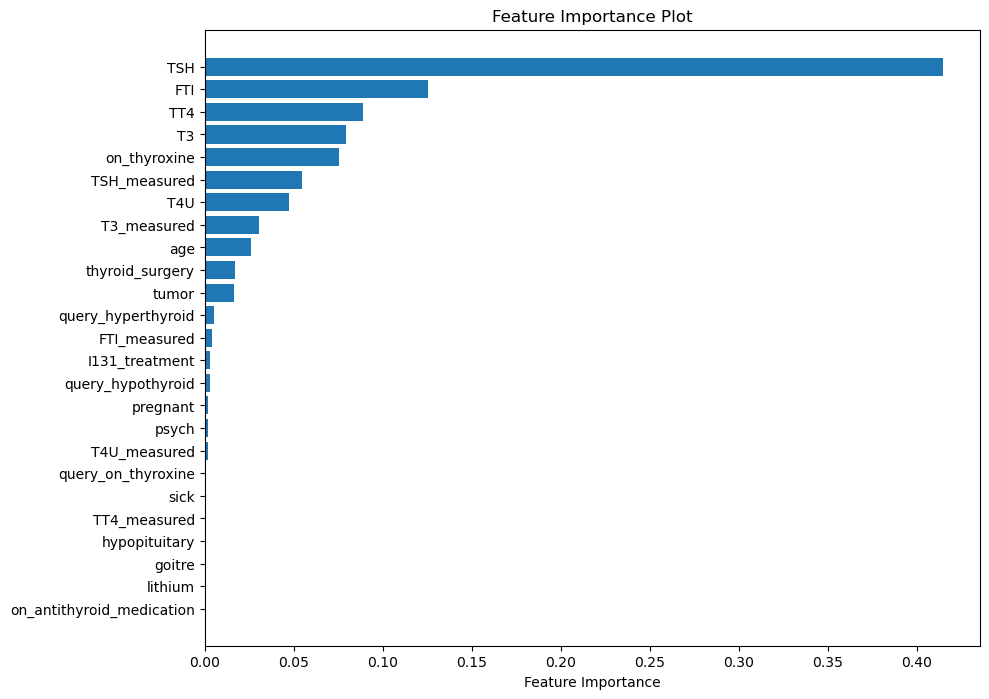

In [58]:
feature_importance = model.feature_importances_
feature_names = X.columns

sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()
